<a href="https://colab.research.google.com/github/gmm39/CS4410_GMcKenzie/blob/main/Homework3_GMcKenzie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gage McKenzie\
CS4410\
Homework 3

In [112]:
# 15.8
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
iris = load_iris()

In [114]:
k_range = range(1, 31)
k_scores = []

In [115]:
# Utilize a loop to run KNeighbors on k=1..30.
# Determine the cross validation score for each iteration.
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, iris.data, iris.target, cv=10)
  k_scores.append(scores.mean())
  print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')


k=1 ; mean accuracy=96.00%; standard deviation=5.33%
k=2 ; mean accuracy=95.33%; standard deviation=5.21%
k=3 ; mean accuracy=96.67%; standard deviation=4.47%
k=4 ; mean accuracy=96.67%; standard deviation=4.47%
k=5 ; mean accuracy=96.67%; standard deviation=4.47%
k=6 ; mean accuracy=96.67%; standard deviation=4.47%
k=7 ; mean accuracy=96.67%; standard deviation=4.47%
k=8 ; mean accuracy=96.67%; standard deviation=4.47%
k=9 ; mean accuracy=97.33%; standard deviation=3.27%
k=10; mean accuracy=96.67%; standard deviation=4.47%
k=11; mean accuracy=96.67%; standard deviation=4.47%
k=12; mean accuracy=97.33%; standard deviation=3.27%
k=13; mean accuracy=98.00%; standard deviation=3.06%
k=14; mean accuracy=97.33%; standard deviation=4.42%
k=15; mean accuracy=97.33%; standard deviation=3.27%
k=16; mean accuracy=97.33%; standard deviation=3.27%
k=17; mean accuracy=97.33%; standard deviation=3.27%
k=18; mean accuracy=98.00%; standard deviation=3.06%
k=19; mean accuracy=97.33%; standard deviation

This shows k=13, 18, 20 to have the highest accuracy

Text(0, 0.5, 'Cross-Validated Accuracy')

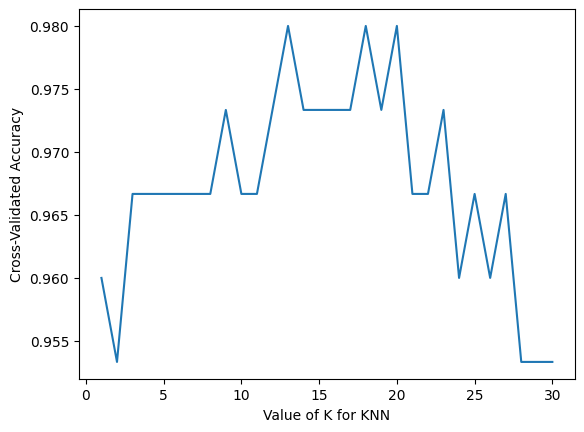

In [116]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

Text(0, 0.5, 'Cross-Validated Accuracy')

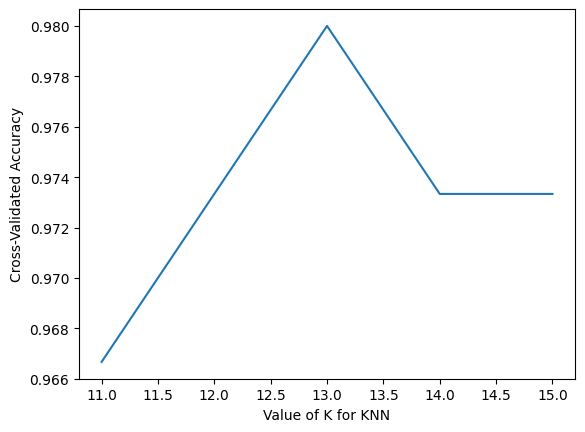

In [117]:
plt.plot(k_range[10:15], k_scores[10:15])
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [118]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [119]:
#Use GridSearchCV to determine the best value for hyperparam K in KNeighbors
grid = GridSearchCV(knn, dict(n_neighbors=k_range), cv=10)
grid.fit(iris.data, iris.target)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].style.format({
    'mean_test_score': '{:,.2%}'.format,
    'std_test_score': '{:,.2%}'.format,
})

,mean_test_score,std_test_score,params
0,96.00%,5.33%,{'n_neighbors': 1}
1,95.33%,5.21%,{'n_neighbors': 2}
2,96.67%,4.47%,{'n_neighbors': 3}
3,96.67%,4.47%,{'n_neighbors': 4}
4,96.67%,4.47%,{'n_neighbors': 5}
5,96.67%,4.47%,{'n_neighbors': 6}
6,96.67%,4.47%,{'n_neighbors': 7}
7,96.67%,4.47%,{'n_neighbors': 8}
8,97.33%,3.27%,{'n_neighbors': 9}
9,96.67%,4.47%,{'n_neighbors': 10}


This shows k=13, 18, 20 to have the highest accuracy matching our results from the previous cross validation loop.

Text(0, 0.5, 'Cross-Validation Accuracy')

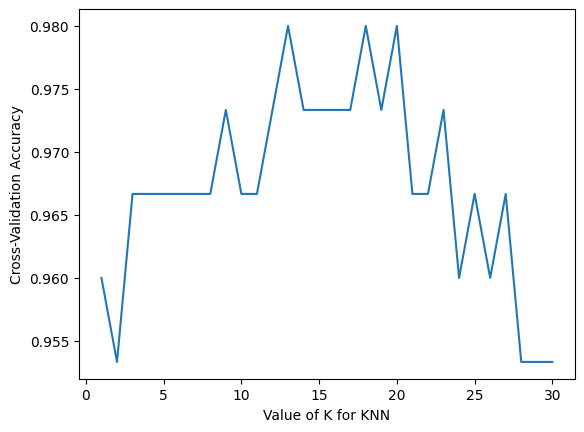

In [120]:
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

Text(0, 0.5, 'Cross-Validation Accuracy')

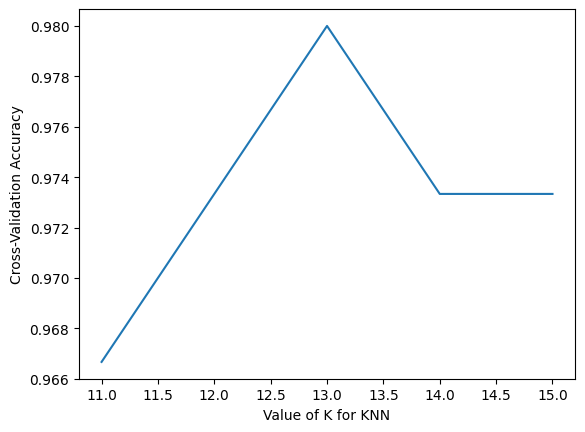

In [121]:
plt.plot(k_range[10:15], grid.cv_results_['mean_test_score'][10:15])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

k=13 is an optimal hyperparameter for K-Nearest Neighbors for this dataset.